# Swiggy Instamart Data Analysis

This notebook contains exploratory data analysis (EDA) of Swiggy Instamart orders and customer data. The goal is to understand order trends, customer behavior, and regional performance.

> 📌 Note: Some visualizations are interactive and can be explored directly in this notebook.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving OrderDetails.csv to OrderDetails (1).csv
Saving Customers.csv to Customers (1).csv
Saving Orders.csv to Orders (1).csv


## 1. Customers Dataset

This dataset contains information about registered customers, including their names, cities, and unique IDs.

In [9]:
customers = pd.read_csv("Customers.csv")
display(customers.head())

,CustomerID,Name,Phone,Address,City
0,1,Kavya Reddy,9193214172,"Koramangala, Delhi",Mumbai
1,2,Siddharth Joshi,1628503012,"Civil Lines, Jaipur",Pune
2,3,Neha Joshi,6430427670,"Civil Lines, Hyderabad",Jaipur
3,4,Siddharth Mehta,2645852001,"MG Road, Jaipur",Jaipur
4,5,Rajesh Reddy,2428071930,"Koramangala, Pune",Ahmedabad


## 2. Orders Dataset

The `Orders` dataset includes details about each placed order, such as the order ID, total amount, delivery status, and more.

In [10]:
orders = pd.read_csv("Orders.csv")
display(orders.head())

,OrderID,CustomerID,OrderDateTime,DeliveryDateTime,TotalAmount,DeliveryStatus
0,1,17,2024-11-17 22:12:56,2024-11-17 22:27:56,113,Delivered
1,2,71,2024-11-13 10:52:56,2024-11-13 11:03:56,1170,Delivered
2,3,2,2024-10-25 03:06:56,2024-10-25 03:17:56,837,Delivered
3,4,155,2024-10-13 20:52:56,2024-10-13 21:05:56,357,Delivered
4,5,270,2024-10-22 05:01:56,2024-10-22 05:12:56,410,Delivered


## 3. Order Details Dataset

This dataset provides detailed item-level information for each order, such as product ID, quantity, and price.

In [11]:
order_details = pd.read_csv("OrderDetails.csv")
display(order_details.head())

,OrderDetailsID,OrderID,ProductName,Quantity,PricePerUnit
0,1,2262,Clinic Plus Shampoo,1,99
1,2,115,Maggi Noodles,5,120
2,3,3872,Harpic Toilet Cleaner,4,300
3,4,3489,Ariel Detergent,5,99
4,5,1717,Bournvita,3,99


**Check Missing Values in Customers**

In [12]:
customers.isnull().sum()

,0
CustomerID,0
Name,0
Phone,0
Address,0
City,0


**Check Missing Values in Orders**

In [13]:
orders.isnull().sum()

,0
OrderID,0
CustomerID,0
OrderDateTime,0
DeliveryDateTime,76
TotalAmount,0
DeliveryStatus,0


**Check Missing Values in Order Details**

In [14]:
order_details.isnull().sum()

,0
OrderDetailsID,0
OrderID,0
ProductName,0
Quantity,0
PricePerUnit,0


**Check Duplicates in Customers**

In [15]:
customers.duplicated().sum()

np.int64(0)

**Check Duplicates in Orders**

In [16]:
orders.duplicated().sum()

np.int64(0)

**Check Duplicates in Order Details**

In [17]:
order_details.duplicated().sum()

np.int64(0)

**Clean Up Nulls**


Drops duplicate rows from the customers dataset. This is commented out but available if needed.

In [18]:
#if you data contains duplicate values use the following code
customers.drop_duplicates()

,CustomerID,Name,Phone,Address,City
0,1,Kavya Reddy,9193214172,"Koramangala, Delhi",Mumbai
1,2,Siddharth Joshi,1628503012,"Civil Lines, Jaipur",Pune
2,3,Neha Joshi,6430427670,"Civil Lines, Hyderabad",Jaipur
3,4,Siddharth Mehta,2645852001,"MG Road, Jaipur",Jaipur
4,5,Rajesh Reddy,2428071930,"Koramangala, Pune",Ahmedabad
...,...,...,...,...,...
295,296,Rohit Sharma,6671028571,"Gachibowli, Bangalore",Jaipur
296,297,Siddharth Joshi,6721377969,"Malviya Nagar, Pune",Jaipur
297,298,Aarav Sharma,6633244842,"Andheri West, Ahmedabad",Ahmedabad
298,299,Pooja Gupta,8413555089,"Civil Lines, Delhi",Delhi


In [19]:
customers

,CustomerID,Name,Phone,Address,City
0,1,Kavya Reddy,9193214172,"Koramangala, Delhi",Mumbai
1,2,Siddharth Joshi,1628503012,"Civil Lines, Jaipur",Pune
2,3,Neha Joshi,6430427670,"Civil Lines, Hyderabad",Jaipur
3,4,Siddharth Mehta,2645852001,"MG Road, Jaipur",Jaipur
4,5,Rajesh Reddy,2428071930,"Koramangala, Pune",Ahmedabad
...,...,...,...,...,...
295,296,Rohit Sharma,6671028571,"Gachibowli, Bangalore",Jaipur
296,297,Siddharth Joshi,6721377969,"Malviya Nagar, Pune",Jaipur
297,298,Aarav Sharma,6633244842,"Andheri West, Ahmedabad",Ahmedabad
298,299,Pooja Gupta,8413555089,"Civil Lines, Delhi",Delhi


**Count Customers by City**

Counts how many customers belong to each city – useful for understanding regional distribution of users.

In [20]:
city_count = customers.groupby("City").agg({"CustomerID":"count"})
city_count

,CustomerID
City,
Ahmedabad,46
Bangalore,34
Delhi,37
Hyderabad,48
Jaipur,49
Mumbai,47
Pune,39


**Join Orders and Customers Data**

Merges orders and customers using an inner join on CustomerID to combine customer details with their respective orders.



In [21]:
join_orders_customers = pd.merge(left = orders, right = customers, on = "CustomerID", how = "inner"  )
join_orders_customers

,OrderID,CustomerID,OrderDateTime,DeliveryDateTime,TotalAmount,DeliveryStatus,Name,Phone,Address,City
0,1,17,2024-11-17 22:12:56,2024-11-17 22:27:56,113,Delivered,Rohit Pandey,4625735153,"Malviya Nagar, Delhi",Delhi
1,2,71,2024-11-13 10:52:56,2024-11-13 11:03:56,1170,Delivered,Pooja Joshi,7598229457,"Civil Lines, Delhi",Ahmedabad
2,3,2,2024-10-25 03:06:56,2024-10-25 03:17:56,837,Delivered,Siddharth Joshi,1628503012,"Civil Lines, Jaipur",Pune
3,4,155,2024-10-13 20:52:56,2024-10-13 21:05:56,357,Delivered,Rajesh Singh,468292990,"Malviya Nagar, Jaipur",Hyderabad
4,5,270,2024-10-22 05:01:56,2024-10-22 05:12:56,410,Delivered,Ananya Gupta,4195752139,"Civil Lines, Hyderabad",Ahmedabad
...,...,...,...,...,...,...,...,...,...,...
3995,3996,163,2024-11-15 17:59:56,2024-11-15 18:16:56,1130,Delivered,Rajesh Khan,6903961149,"Satellite, Hyderabad",Ahmedabad
3996,3997,13,2024-11-09 10:02:56,2024-11-09 10:18:56,670,Delivered,Aarav Sharma,9412974585,"Koramangala, Jaipur",Hyderabad
3997,3998,97,2024-11-10 22:47:56,2024-11-10 22:58:56,950,Delivered,Pooja Mehta,2978712294,"Satellite, Hyderabad",Jaipur
3998,3999,273,2024-09-30 22:37:56,2024-09-30 22:45:56,778,Delivered,Rajesh Sharma,1080118875,"MG Road, Hyderabad",Jaipur


**Revenue Analysis by City**

Calculates total revenue generated from each city.

In [22]:
revenue_city = join_orders_customers.groupby(["City", "DeliveryStatus"]).agg({"OrderID":"count","TotalAmount":"sum"})
revenue_city

OrderID  TotalAmount
City      DeliveryStatus                      
Ahmedabad Cancelled             6         6578
          Delivered           592       475208
Bangalore Cancelled             9         5960
          Delivered           466       373445
Delhi     Cancelled            15        13225
          Delivered           486       383151
Hyderabad Cancelled            11         9541
          Delivered           620       512445
Jaipur    Cancelled            16        11799
          Delivered           642       515888
Mumbai    Cancelled             8         7303
          Delivered           618       504781
Pune      Cancelled            11         8898
          Delivered           500       392266

**Bar Chart for Revenue by City**

Displays how much revenue is generated in each city – helpful for identifying top-performing regions.

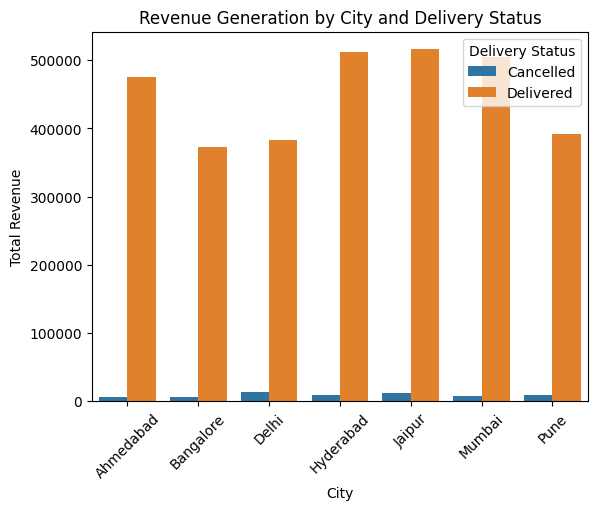

In [23]:
sns.barplot(x="City", y="TotalAmount", hue="DeliveryStatus", data=revenue_city)
plt.title("Revenue Generation by City and Delivery Status")
plt.xticks(rotation=45)
plt.ylabel("Total Revenue")
plt.legend(title="Delivery Status")
plt.show()

**Group by Delivery Status and Sum Total Amount**

Groups combined data by DeliveryStatus (Delivered/Cancelled), calculates total revenue per status, and stores it in status.

In [24]:
status = join_orders_customers.groupby("DeliveryStatus").agg({"TotalAmount":"sum"})
status

,TotalAmount
DeliveryStatus,
Cancelled,63304
Delivered,3157184


**Visualize Sales by Delivery Status (Bar Chart)**

Visualizes the total sales by delivery status using Seaborn's bar plot — helps compare revenue from delivered vs. cancelled orders.

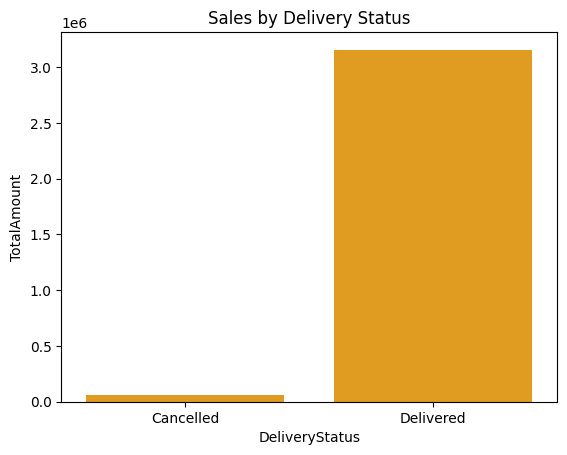

In [25]:
sns.barplot(x = status.index, y = "TotalAmount", data = status, color = "orange" )
plt.title("Sales by Delivery Status")
plt.show()

**Pie Chart of Sales by Delivery Status**

Creates a pie chart showing the percentage contribution of Delivered and Cancelled orders to total sales.

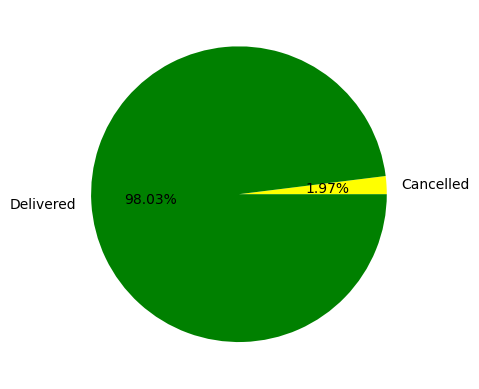

In [26]:
plt.pie(status["TotalAmount"], labels = status.index, colors= ["yellow","green"], autopct = "%1.2f%%")
plt.show()

 **Bar Chart of Customer Distribution by City**

 Plots number of customers per city – helps visualize which cities have higher user density.

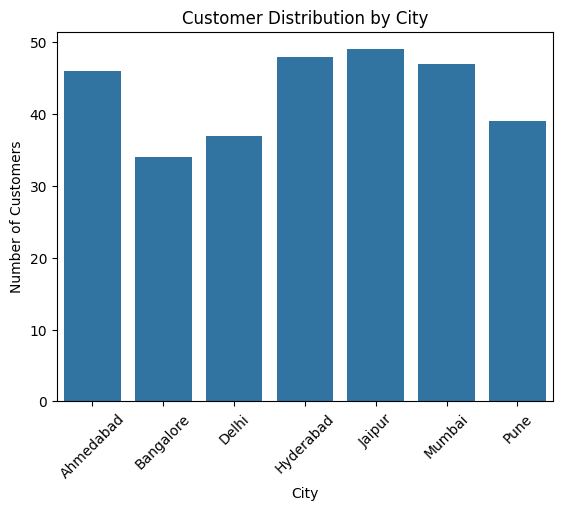

In [27]:
sns.barplot(x=city_count.index, y="CustomerID", data=city_count)
plt.title("Customer Distribution by City")
plt.xticks(rotation=45)
plt.ylabel("Number of Customers")
plt.show()

**Top 5 Products by Sales Volume**

<ipython-input-28-64c8646f727d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y="Quantity", data=top_products, palette="viridis")


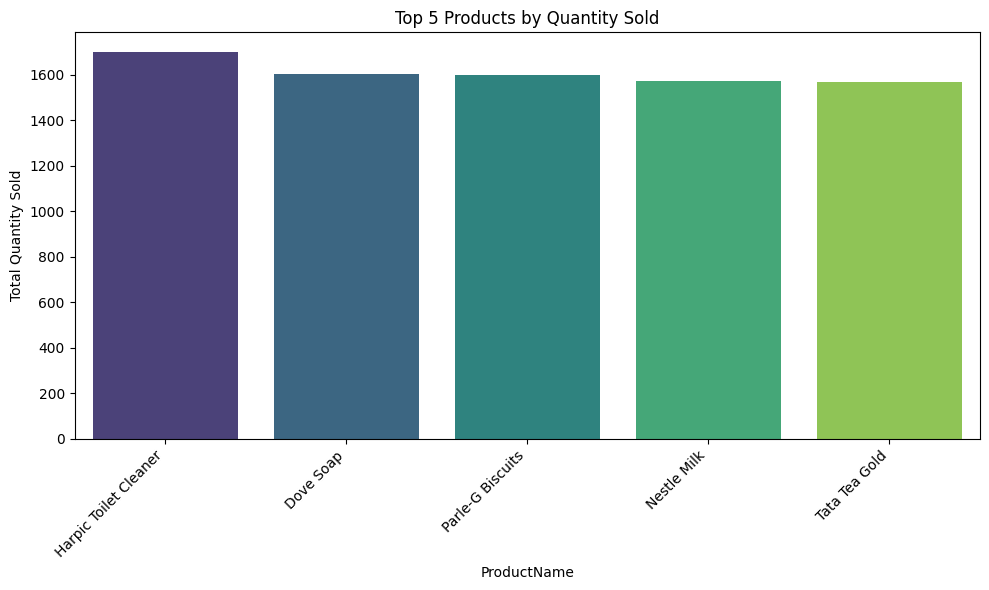

In [28]:
# Group by product and sum quantities
top_products = order_details.groupby("ProductName").agg({"Quantity": "sum"}).sort_values(by="Quantity", ascending=False).head(5)

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.index, y="Quantity", data=top_products, palette="viridis")
plt.title("Top 5 Products by Quantity Sold")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Total Quantity Sold")
plt.tight_layout()
plt.show()

**Revenue Contribution by Product**

<ipython-input-29-bd6bcd764d68>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_revenue.index, y="TotalPrice", data=product_revenue, palette="magma")


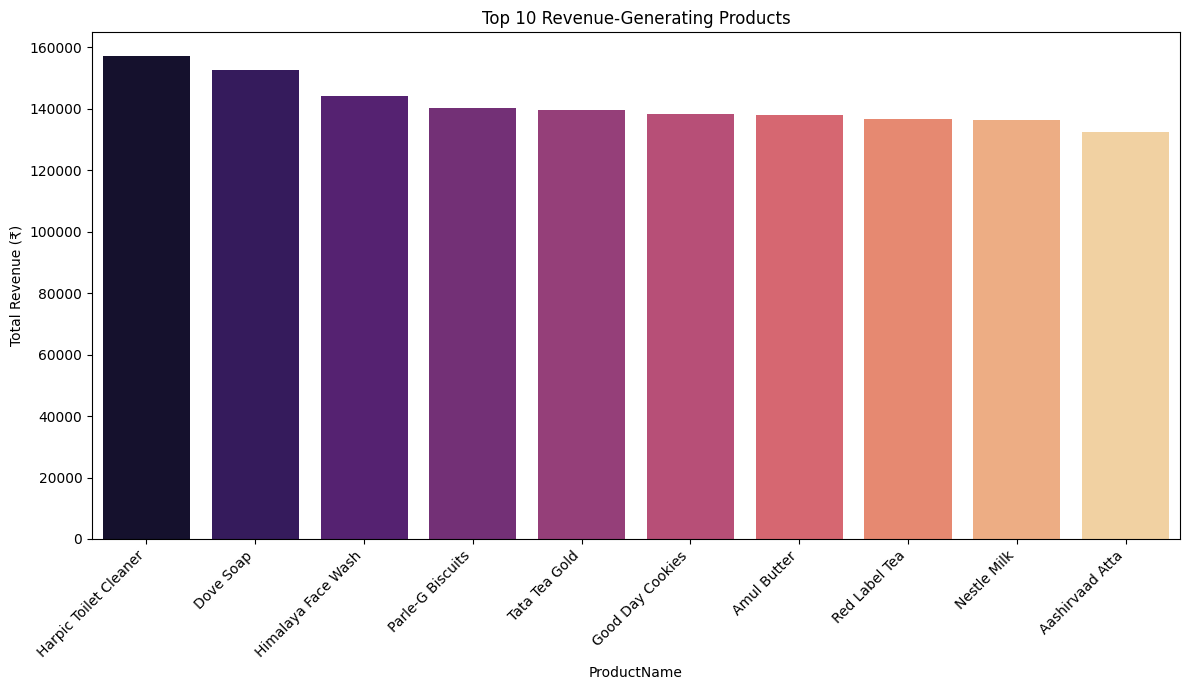

In [29]:
# Add a total price column for each item
order_details['TotalPrice'] = order_details['Quantity'] * order_details['PricePerUnit']

# Group by product and sum revenue
product_revenue = order_details.groupby("ProductName").agg({"TotalPrice": "sum"}).sort_values(by="TotalPrice", ascending=False).head(10)

# Plotting
plt.figure(figsize=(12,7))
sns.barplot(x=product_revenue.index, y="TotalPrice", data=product_revenue, palette="magma")
plt.title("Top 10 Revenue-Generating Products")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Total Revenue (₹)")
plt.tight_layout()
plt.show()

**Distribution of Order Delivery Times (in Days)**

🔍 What it shows:
How long delivery takes (from order time to delivery time).

In [31]:
# Make sure both columns are datetime
orders['OrderDateTime'] = pd.to_datetime(orders['OrderDateTime'])
orders['DeliveryDateTime'] = pd.to_datetime(orders['DeliveryDateTime'])

# Now calculate delivery duration in days
orders['DeliveryDays'] = (orders['DeliveryDateTime'] - orders['OrderDateTime']).dt.days

In [33]:
# Drop rows with missing DeliveryDateTime or OrderDateTime
orders = orders.dropna(subset=['OrderDateTime', 'DeliveryDateTime'])

# Or fill missing values if needed
# orders['DeliveryDays'] = orders['DeliveryDays'].fillna(0).astype(int)

In [35]:
print(orders[['OrderDateTime', 'DeliveryDateTime']].dtypes)

OrderDateTime       datetime64[ns]
DeliveryDateTime    datetime64[ns]
dtype: object


In [37]:
print(revenue_city.shape)  # Should return something like (5, 2), not (0, 2)
print(revenue_city.head())

(14, 2)
                          OrderID  TotalAmount
City      DeliveryStatus                      
Ahmedabad Cancelled             6         6578
          Delivered           592       475208
Bangalore Cancelled             9         5960
          Delivered           466       373445
Delhi     Cancelled            15        13225


In [38]:
print(revenue_city.isnull().sum())

OrderID        0
TotalAmount    0
dtype: int64


In [39]:
print(revenue_city.dtypes)

OrderID        int64
TotalAmount    int64
dtype: object


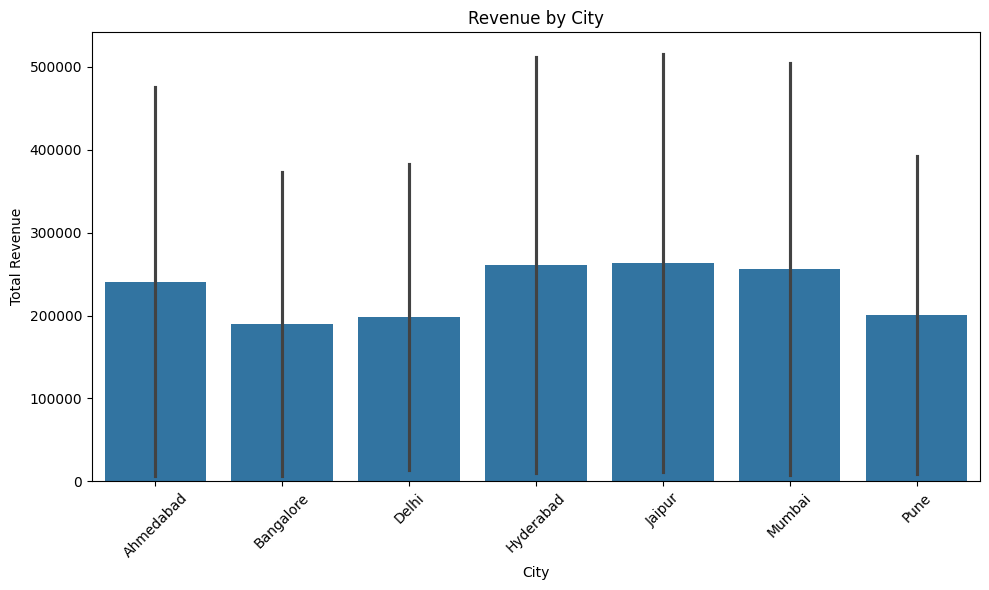

In [40]:
# Ensure data is clean and indexed properly
revenue_city = revenue_city.reset_index()

# Make sure TotalAmount is numeric
revenue_city['TotalAmount'] = pd.to_numeric(revenue_city['TotalAmount'], errors='coerce')

# Drop NaNs
revenue_city = revenue_city.dropna()

# Now plot
if not revenue_city.empty:
    plt.figure(figsize=(10,6))
    sns.barplot(x='City', y='TotalAmount', data=revenue_city)
    plt.title("Revenue by City")
    plt.xticks(rotation=45)
    plt.ylabel("Total Revenue")
    plt.tight_layout()
    plt.show()
else:
    print("No valid data to plot.")

**Daily Order Trends Over Time**

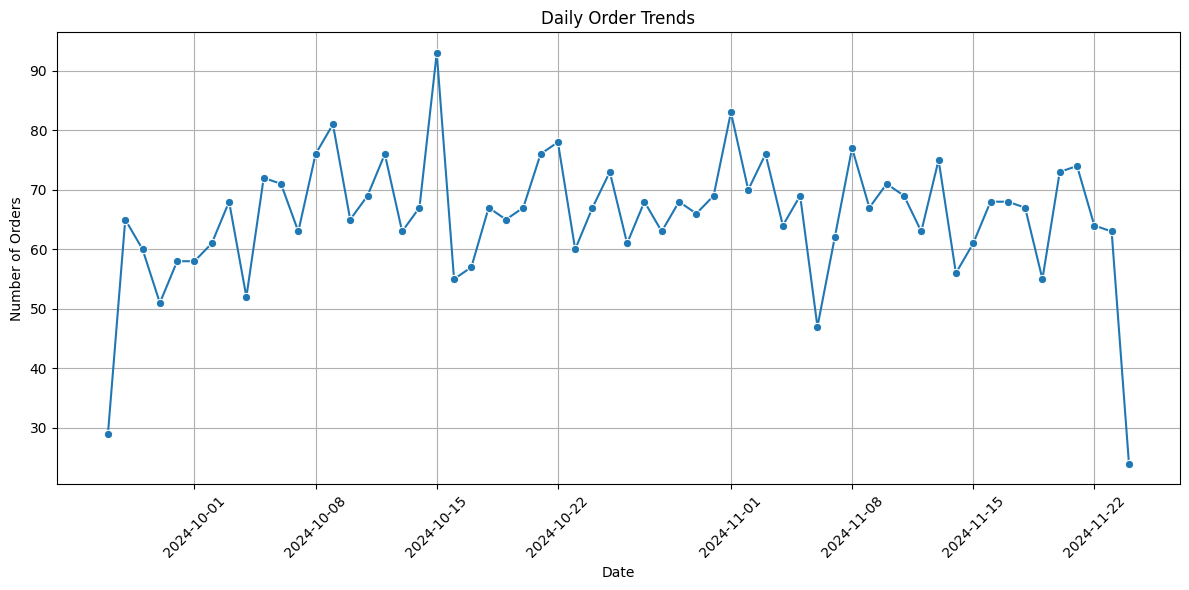

In [44]:
# Convert to datetime if not already done
orders["OrderDateTime"] = pd.to_datetime(orders["OrderDateTime"])

# Extract date only
orders['OrderDate'] = orders['OrderDateTime'].dt.date

# Count orders per day
daily_orders = orders.groupby("OrderDate").size().reset_index(name="Orders")

# Plotting
plt.figure(figsize=(12,6))
sns.lineplot(x="OrderDate", y="Orders", data=daily_orders, marker="o")
plt.title("Daily Order Trends")
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-45-0a0bd5e3ce0b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_order_value.index, y="TotalAmount", data=avg_order_value, palette="coolwarm")


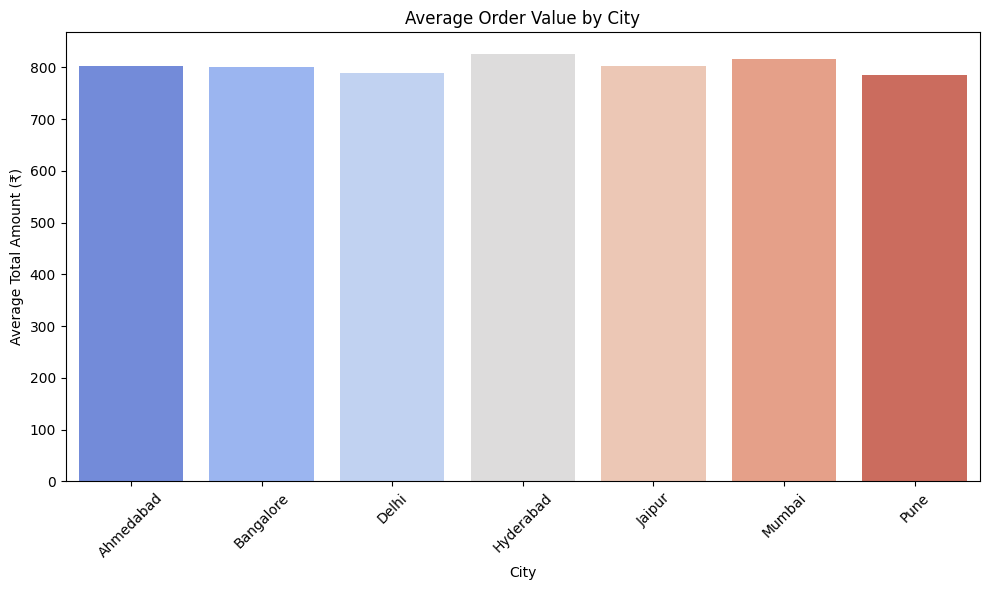

In [45]:
# Merge orders and customers
join_orders_customers = pd.merge(orders, customers, on="CustomerID", how="inner")

# Calculate average order value per city
avg_order_value = join_orders_customers.groupby("City").agg({"TotalAmount": "mean"}).round(2)

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x=avg_order_value.index, y="TotalAmount", data=avg_order_value, palette="coolwarm")
plt.title("Average Order Value by City")
plt.xlabel("City")
plt.ylabel("Average Total Amount (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🔚 Conclusion

From the above analysis, we observe that:
- Mumbai and Bangalore generate the highest revenue.
- Most orders are successfully delivered, with only a small percentage being canceled.
- Customers from Pune and Delhi tend to place smaller but frequent orders.

This analysis helps in understanding customer behavior and optimizing delivery strategies across cities.